In [5]:
# Importing Libraries and Data
import numpy as np
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

df = pd.read_csv(r"\Users\Terence\Desktop\Predicting Used Car Prices\vehicles.csv")

In [6]:
# Get a quick glimpse of what I'm working with
print(df.shape)
print(df.columns)
df.head()

(539759, 25)
Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'vin', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long'],
      dtype='object')


,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,drive,size,type,paint_color,image_url,description,county,state,lat,long
0,7088746062,https://greensboro.craigslist.org/ctd/d/cary-2...,greensboro,https://greensboro.craigslist.org,10299,2012.0,acura,tl,NaN,NaN,...,NaN,NaN,other,blue,https://images.craigslist.org/01414_3LIXs9EO33...,2012 Acura TL Base 4dr Sedan Offered by: B...,NaN,nc,35.7636,-78.7443
1,7088745301,https://greensboro.craigslist.org/ctd/d/bmw-3-...,greensboro,https://greensboro.craigslist.org,0,2011.0,bmw,335,NaN,6 cylinders,...,rwd,NaN,convertible,blue,https://images.craigslist.org/00S0S_1kTatLGLxB...,BMW 3 Series 335i Convertible Navigation Dakot...,NaN,nc,NaN,NaN
2,7088744126,https://greensboro.craigslist.org/cto/d/greens...,greensboro,https://greensboro.craigslist.org,9500,2011.0,jaguar,xf,excellent,NaN,...,NaN,NaN,NaN,blue,https://images.craigslist.org/00505_f22HGItCRp...,2011 jaguar XF premium - estate sale. Retired ...,NaN,nc,36.1032,-79.8794
3,7088743681,https://greensboro.craigslist.org/ctd/d/cary-2...,greensboro,https://greensboro.craigslist.org,3995,2004.0,honda,element,NaN,NaN,...,fwd,NaN,SUV,orange,https://images.craigslist.org/00E0E_eAUnhFF86M...,2004 Honda Element LX 4dr SUV Offered by: ...,NaN,nc,35.7636,-78.7443
4,7074612539,https://lincoln.craigslist.org/ctd/d/gretna-20...,lincoln,https://lincoln.craigslist.org,41988,2016.0,chevrolet,silverado k2500hd,NaN,NaN,...,NaN,NaN,NaN,NaN,https://images.craigslist.org/00S0S_8msT7RQquO...,"Shop Indoors, Heated Showroom!!!www.gretnaauto...",NaN,ne,41.1345,-96.2458


In [7]:
# Want to better understand my numerical variables, specifically the min and max (range)
df.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,id,price,year,odometer,county,lat,long
count,539759.000000,539759.000000,538772.000000,440783.000000,0.000000,530785.000000,530785.000000
mean,7087608553.749804,195421.387573,2009.830982,100800.803259,nan,38.432128,-94.040501
std,5234175.784002,22082524.011577,9.161334,176705.802933,nan,5.916936,17.626658
min,7065764796.000000,0.000000,0.000000,0.000000,nan,-84.911400,-176.810000
25%,7084240305.500000,4400.000000,2007.000000,47038.500000,nan,34.197100,-106.782000
50%,7088972959.000000,9500.000000,2012.000000,93300.000000,nan,39.077600,-88.100900
75%,7092094043.000000,17926.000000,2015.000000,137755.000000,nan,42.449100,-81.219000
max,7093536715.000000,4294967295.000000,2021.000000,64809218.000000,nan,84.514800,161.016000


In [9]:
# Want to better understand categorical data
df.nunique(axis=0)

id              539759
url             539759
region             403
region_url         413
price            18386
year               113
manufacturer        43
model            36948
condition            6
cylinders            8
fuel                 5
odometer        122400
title_status         6
transmission         3
vin             181677
drive                3
size                 4
type                13
paint_color         12
image_url       364282
description     454053
county               0
state               51
lat              54587
long             54552
dtype: int64

In [10]:
df.dtypes

id                int64
url              object
region           object
region_url       object
price             int64
year            float64
manufacturer     object
model            object
condition        object
cylinders        object
fuel             object
odometer        float64
title_status     object
transmission     object
vin              object
drive            object
size             object
type             object
paint_color      object
image_url        object
description      object
county          float64
state            object
lat             float64
long            float64
dtype: object

In [11]:
# Remove columns with more than 40% missing values
NA_val = df.isna().sum()

def na_filter(na, threshold = .4): #only select variables that passees the threshold
    col_pass = []
    for i in na.keys():
        if na[i]/df.shape[0]<threshold:
            col_pass.append(i)
    return col_pass

df_cleaned = df[na_filter(NA_val)]
df_cleaned.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'fuel', 'odometer', 'title_status', 'transmission', 'drive',
       'type', 'paint_color', 'image_url', 'description', 'state', 'lat',
       'long'],
      dtype='object')

In [12]:
### Getting rid of outliers for dependent variable ###
df_cleaned = df_cleaned[df_cleaned['price'].between(999.99, 250000)] # need to first get rid of unrealistic points to compute IQR more accurately
df_cleaned.describe()

,id,price,year,odometer,lat,long
count,4.809900e+05,480990.000000,480061.000000,3.978080e+05,476979.000000,476979.000000
mean,7.087621e+09,14089.139173,2009.559868,1.028304e+05,38.482458,-93.881953
std,5.223495e+06,11597.483428,9.266086,1.816533e+05,5.932163,17.524500
min,7.065765e+09,1000.000000,0.000000,0.000000e+00,-84.911400,-176.810000
25%,7.084268e+09,5900.000000,2007.000000,4.919500e+04,34.254300,-106.458000
50%,7.088985e+09,10995.000000,2011.000000,9.566100e+04,39.123400,-88.049000
75%,7.092091e+09,18995.000000,2015.000000,1.400000e+05,42.463800,-81.165500
max,7.093537e+09,250000.000000,2021.000000,6.480922e+07,84.514800,161.016000


In [13]:
# Computing IQR
Q1 = df_cleaned['price'].quantile(0.25)
Q3 = df_cleaned['price'].quantile(0.75)
IQR = Q3 - Q1

# Filtering Values between Q1-1.5IQR and Q3+1.5IQR
df_filtered = df_cleaned.query('(@Q1 - 1.5 * @IQR) <= price <= (@Q3 + 1.5 * @IQR)')
df_filtered.boxplot('price')

In [14]:
# Checking values again
df_filtered.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,id,price,year,odometer,lat,long
count,464354.000000,464354.000000,463765.000000,383129.000000,460523.000000,460523.000000
mean,7087623849.464673,12748.572374,2009.409179,104964.186919,38.461849,-93.644432
std,5220950.531307,8682.629866,9.126002,183079.280853,5.905147,17.435375
min,7065764796.000000,1000.000000,0.000000,0.000000,-84.911400,-176.810000
25%,7084276125.500000,5708.500000,2006.000000,52532.000000,34.263900,-105.948000
50%,7088987016.500000,10550.000000,2011.000000,98152.000000,39.123400,-87.871700
75%,7092091386.750000,17995.000000,2015.000000,141500.000000,42.449000,-81.033900
max,7093536715.000000,38629.000000,2021.000000,64809218.000000,84.514800,161.016000


In [15]:
# Removing unrealistic outliers for independent variables

df_filtered = df_filtered[df_filtered['year'].between(1900, 2020)] # cant be newer than 2020
df_filtered = df_filtered[df_filtered['odometer'].between(0, 271431.5)] # = 140000 + 1.5 * (140000-52379)
print(df_filtered.shape)
print(df_filtered.columns)

(378282, 20)
Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'fuel', 'odometer', 'title_status', 'transmission', 'drive',
       'type', 'paint_color', 'image_url', 'description', 'state', 'lat',
       'long'],
      dtype='object')


In [16]:
# summary of NA values present
df_filtered.isna().sum()

id                  0
url                 0
region              0
region_url          0
price               0
year                0
manufacturer    10708
model            3537
fuel             2562
odometer            0
title_status     2106
transmission     2981
drive           79540
type            69690
paint_color     92161
image_url           0
description         2
state               0
lat              3228
long             3228
dtype: int64

In [17]:
# Dropping last few columns

df_final = df_filtered.copy().drop(['id','url','region_url','image_url','region','description','model','state','paint_color'], axis=1) #removing region since lat/long mean same thing
df_final.shape

(378282, 11)

In [18]:
# Dropping rows with null values
df_final = df_final.dropna(axis=0)
df_final.shape

(250461, 11)

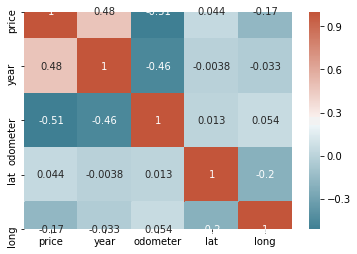

In [19]:
import matplotlib.pylab as plt
import seaborn as sns

# calculate correlation matrix
corr = df_final.corr()
# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

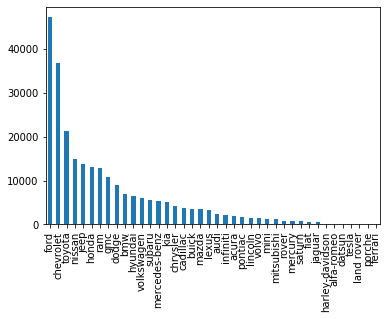

In [20]:
df_final['manufacturer'].value_counts().plot(kind='bar')

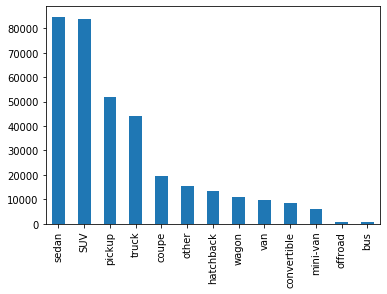

In [21]:
df_cleaned['type'].value_counts().plot(kind='bar')

In [22]:
# Converting categorical variables into dummy variables
df_final = pd.get_dummies(df_final, drop_first=True)
print(df_final.columns)

Index(['price', 'year', 'odometer', 'lat', 'long', 'manufacturer_alfa-romeo',
       'manufacturer_audi', 'manufacturer_bmw', 'manufacturer_buick',
       'manufacturer_cadillac', 'manufacturer_chevrolet',
       'manufacturer_chrysler', 'manufacturer_datsun', 'manufacturer_dodge',
       'manufacturer_ferrari', 'manufacturer_fiat', 'manufacturer_ford',
       'manufacturer_gmc', 'manufacturer_harley-davidson',
       'manufacturer_honda', 'manufacturer_hyundai', 'manufacturer_infiniti',
       'manufacturer_jaguar', 'manufacturer_jeep', 'manufacturer_kia',
       'manufacturer_land rover', 'manufacturer_lexus', 'manufacturer_lincoln',
       'manufacturer_mazda', 'manufacturer_mercedes-benz',
       'manufacturer_mercury', 'manufacturer_mini', 'manufacturer_mitsubishi',
       'manufacturer_nissan', 'manufacturer_pontiac', 'manufacturer_porche',
       'manufacturer_ram', 'manufacturer_rover', 'manufacturer_saturn',
       'manufacturer_subaru', 'manufacturer_tesla', 'manufacturer_toy

In [23]:
# Scaling the data
from sklearn.preprocessing import StandardScaler
X_head = df_final.iloc[:, df_final.columns != 'price']

X = df_final.loc[:, df_final.columns != 'price']
y = df_final['price']
X = StandardScaler().fit_transform(X)

In [24]:
# Creating the model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as mae

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=0)
model = RandomForestRegressor(random_state=1)
model.fit(X_train, y_train)
pred = model.predict(X_test)

C:\Users\Terence\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [25]:
# Checking accuracy of model
print(mae(y_test, pred))
print(df_final['price'].mean())

1741.711083553408
13694.816793832173


In [26]:
model.score(X_test,y_test)

0.8823434540557525

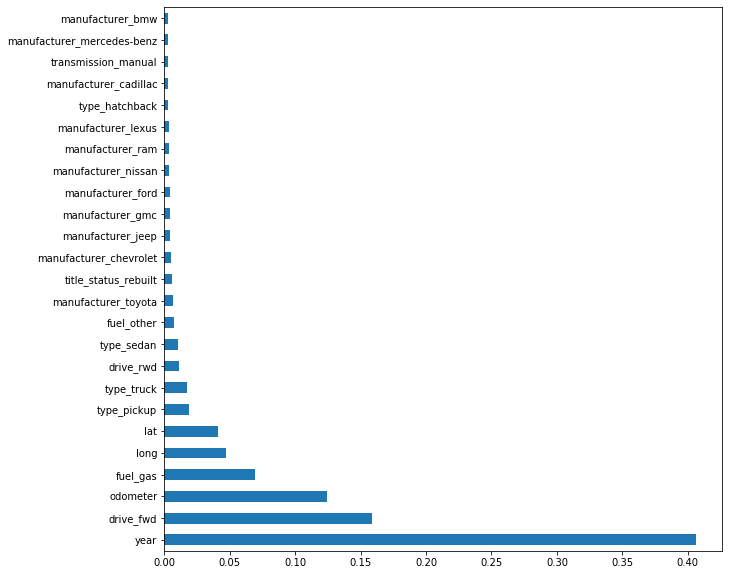

In [27]:
feat_importances = pd.Series(model.feature_importances_, index=X_head.columns)
feat_importances.nlargest(25).plot(kind='barh',figsize=(10,10))